In [91]:
import contextily as ctx
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import requests
import json


In [2]:
stations = gpd.GeoDataFrame()
stations['geometry'] = None

In [8]:
#df_stations = pd.read_csv(r"C:/Users/rafas/Desktop/Sthe/Project/Stations.txt") 

In [64]:
response_paris = requests.get(
    'https://api.waqi.info/v2/map/bounds?latlng=48.906116,2.225504,48.813514,2.466307&networks=all&token=7b5dd86fc12812d40a2d725d9296813872fd7caa')
response_skopje = requests.get('https://api.waqi.info/v2/map/bounds?latlng=42.057215,21.343864,41.946194,21.523439&networks=all&token=7b5dd86fc12812d40a2d725d9296813872fd7caa')

In [65]:
response_skopje


<Response [200]>

In [66]:
raw_data_paris = response_paris.text
raw_data_skopje = response_skopje.text


In [67]:
data_paris = json.loads(raw_data_paris)
data_skopje = json.loads(raw_data_skopje)
data_skopje

{'status': 'ok',
 'data': [{'lat': 42.004904,
   'lon': 21.36479,
   'uid': 12408,
   'aqi': '57',
   'station': {'name': 'MobileGP, Macedonia (Мобилна станица - Ѓ. Петров)',
    'time': '2022-05-23T21:00:00+09:00'}},
  {'lat': 42.0036,
   'lon': 21.4636,
   'uid': 8104,
   'aqi': '61',
   'station': {'name': 'Gazi Baba, Skopje, Macedonia (Гази Баба)',
    'time': '2022-05-23T21:00:00+09:00'}},
  {'lat': 41.9783,
   'lon': 21.47,
   'uid': 8106,
   'aqi': '59',
   'station': {'name': 'Lisice, Macedonia (Лисиче)',
    'time': '2022-05-23T21:00:00+09:00'}},
  {'lat': 41.99249998,
   'lon': 21.42361109,
   'uid': 8103,
   'aqi': '45',
   'station': {'name': 'Centar, Skopje, Macedonia (Центар)',
    'time': '2022-05-23T20:00:00+09:00'}},
  {'lat': 42.00666664,
   'lon': 21.38694446,
   'uid': 8105,
   'aqi': '31',
   'station': {'name': 'Karposh, Skopje, Macedonia (Карпош)',
    'time': '2022-05-23T20:00:00+09:00'}},
  {'lat': 41.9992,
   'lon': 21.4408,
   'uid': 8107,
   'aqi': '80',
   

In [68]:
df_stations_paris = pd.json_normalize(data_paris['data'])
df_stations_skopje = pd.json_normalize(data_skopje['data'])
df_stations_skopje


,lat,lon,uid,aqi,station.name,station.time
0,42.004904,21.364790,12408,57,"MobileGP, Macedonia (Мобилна станица - Ѓ. Петров)",2022-05-23T21:00:00+09:00
1,42.003600,21.463600,8104,61,"Gazi Baba, Skopje, Macedonia (Гази Баба)",2022-05-23T21:00:00+09:00
2,41.978300,21.470000,8106,59,"Lisice, Macedonia (Лисиче)",2022-05-23T21:00:00+09:00
3,41.992500,21.423611,8103,45,"Centar, Skopje, Macedonia (Центар)",2022-05-23T20:00:00+09:00
4,42.006667,21.386944,8105,31,"Karposh, Skopje, Macedonia (Карпош)",2022-05-23T20:00:00+09:00
5,41.999200,21.440800,8107,80,"Rektorat, Skopje, Macedonia (Ректорат)",2022-05-23T21:00:00+09:00


In [69]:
gdf_paris = gpd.GeoDataFrame(
    df_stations_paris["station.name"], geometry=gpd.points_from_xy(df_stations_paris.lon, df_stations_paris.lat))
gdf_skopje = gpd.GeoDataFrame(
    df_stations_skopje["station.name"], geometry=gpd.points_from_xy(df_stations_skopje.lon, df_stations_skopje.lat))
print(gdf_skopje)

                                        station.name  \
0  MobileGP, Macedonia (Мобилна станица - Ѓ. Петров)   
1           Gazi Baba, Skopje, Macedonia (Гази Баба)   
2                         Lisice, Macedonia (Лисиче)   
3                 Centar, Skopje, Macedonia (Центар)   
4                Karposh, Skopje, Macedonia (Карпош)   
5             Rektorat, Skopje, Macedonia (Ректорат)   

                    geometry  
0  POINT (21.36479 42.00490)  
1  POINT (21.46360 42.00360)  
2  POINT (21.47000 41.97830)  
3  POINT (21.42361 41.99250)  
4  POINT (21.38694 42.00667)  
5  POINT (21.44080 41.99920)  


In [57]:
world = gpd.read_file(gpd.datasets.get_path('gis_osm_buildings_a_free_1.shp'))

# We restrict to Europe
ax = world[world.continent == 'Europe'].plot(
    color='white', edgecolor='black',figsize=(20,20))
ax.set_xlim(0,10)
ax.set_ylim(30, 60)

# We can now plot our ``GeoDataFrame``.
mapping=gdf.plot(ax=ax, color='red')

AttributeError: 'GeoDataFrame' object has no attribute 'continent'

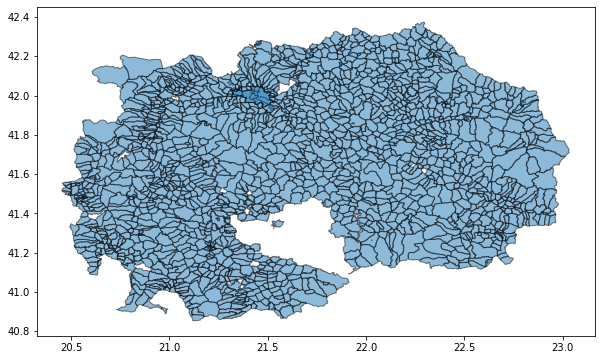

In [75]:
df_skopje = gpd.read_file(
    'gis_osm_places_a_free_1.shp')
ax_skopje = df_skopje.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')


In [81]:
df_skopje.crs = "epsg:3857"
print(df_skopje.crs)


epsg:3857


In [85]:
df_wm_skopje = df_skopje.to_crs(epsg=3857)

AttributeError: module 'contextily' has no attribute 'add_basemap'

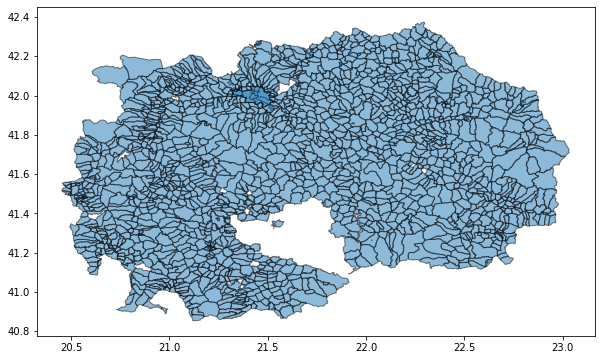

In [92]:
ax_skopje = df_wm_skopje.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax_skopje)


In [17]:
#lat=df_stations.Latitude
#long=df_stations.Longitude

In [43]:
#coord=[]
#for i in range (len(df_stations.index)):
    #point=[]
    #point.append(lat[i])
    #point.append(long[i])
    #pt=Point(point)
    #coord.append(pt)

In [44]:
#for i in range (len(df_stations.index)):
    #stations.loc[i, 'geometry'] = coord[i]
#print(stations['geometry'])

0    POINT (48.85661 2.35222)
1    POINT (48.84030 2.63463)
2    POINT (48.90240 2.45261)
Name: geometry, dtype: geometry


In [45]:
#stations.crs = "EPSG:4326"
#print(stations.crs)

EPSG:4326


In [53]:
#stations.to_file(r'C:/Users/rafas/Desktop/Sthe/Project/stations_project.shp')
#stations.to_file(r'C:/Users/rafas/Desktop/Sthe/Project/stations_project.gpkg')

C:\Users\rafas\anaconda3\envs\sthe\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\rafas\anaconda3\envs\sthe\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

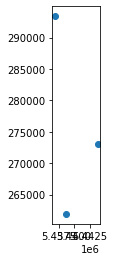

In [54]:
#plt = gpd.read_file(r'C:/Users/rafas/Desktop/Sthe/Project/stations_project.gpkg').to_crs(epsg=3857)
#plt.plot()

HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
https://stamen-tiles-a.a.ssl.fastly.net/terrain/14/10414/8071.png

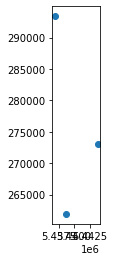

In [55]:
#ax = plt.plot()
#ctx.add_basemap(ax)